img shapes : (650, 607) (650, 607) (650, 607) (650, 606)


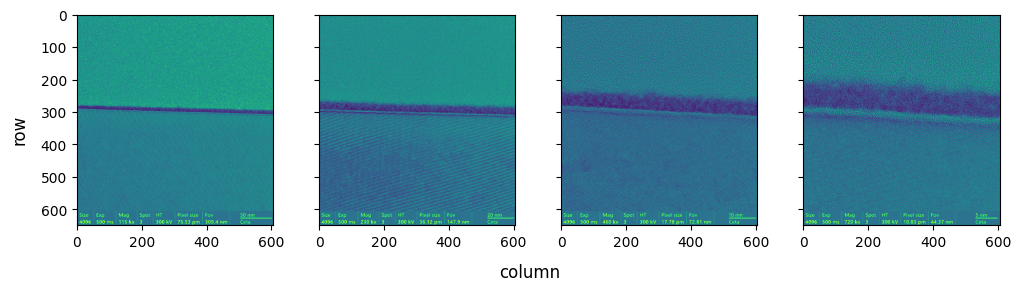

In [42]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('TEM_image/N2_115k_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('TEM_image/N2_230k_1.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('TEM_image/N2_460k_1.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('TEM_image/N2_720k_1.jpg', cv2.IMREAD_GRAYSCALE)
print('img shapes :', img1.shape, img2.shape, img3.shape, img4.shape)

imgs = [img1, img2, img3, img4]
fig, axs = plt.subplots(1,4, sharex=True, sharey=True, figsize=(10,4))
fig.tight_layout()
for idx, elem in enumerate(imgs):
    axs[idx].imshow(elem)
fig.supxlabel('column', y=0.12)
fig.supylabel('row', x=-0.02)
plt.show()

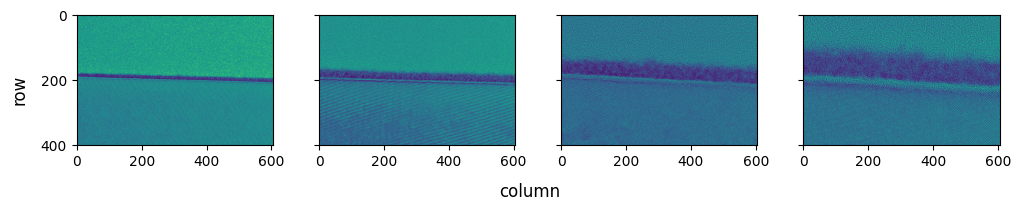

In [46]:
def CutImg(img):
    return img[100:501,:]
imgs_resized = [CutImg(i) for i in imgs]

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, figsize=(10,4))
fig.tight_layout()
for idx, elem in enumerate(imgs_resized):
    axs[idx].imshow(elem)
fig.supxlabel('column', y=0.22)
fig.supylabel('row', x=-0.02)
plt.show()

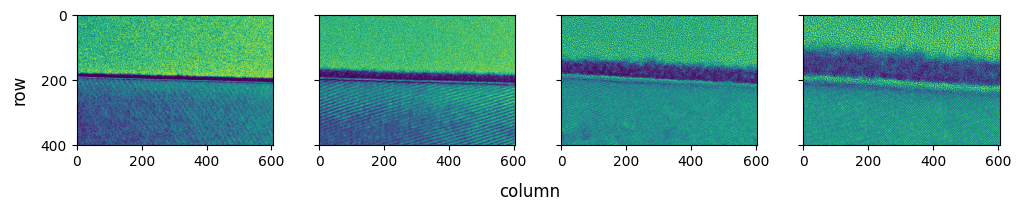

In [47]:
# histogram equalization; minmaxscaling * 255
imgs_equalized = [cv2.equalizeHist(i) for i in imgs_resized]

fig, axs = plt.subplots(1,4, sharex=True, sharey=True, figsize=(10,4))
fig.tight_layout()
for idx, elem in enumerate(imgs_equalized):
    axs[idx].imshow(elem)
fig.supxlabel('column', y=0.22)
fig.supylabel('row', x=-0.02)
plt.show()

In [59]:
# make a kernel for morphological transformation
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [69]:
cv2.morphologyEx(img1, op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)))

array([[166, 166, 166, ..., 165, 167, 148],
       [166, 188, 135, ..., 148, 148, 148],
       [164, 170, 170, ..., 166, 167, 148],
       ...,
       [ 97, 102,  97, ...,  97,  97,  97],
       [ 97,  97,  97, ...,  97,  97,  97],
       [ 97,  97,  97, ...,  97,  97,  97]], dtype=uint8)

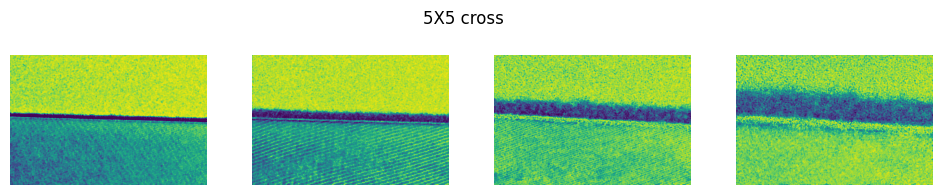

In [81]:
def OptimalKernel(kernel, dim, shape):
    imgs_transformed = [cv2.morphologyEx(i, op=cv2.MORPH_CLOSE, kernel=kernel) for i in imgs_equalized]
    
    fig, axs = plt.subplots(1,4, sharex=True, sharey=True, figsize=(10,4))
    fig.tight_layout()
    for idx, elem in enumerate(imgs_transformed):
        axs[idx].imshow(elem)
        axs[idx].set_axis_off()
    # fig.supxlabel('column', y=0.22)
    # fig.supylabel('row', x=-0.02)
    fig.suptitle(f'{dim}X{dim} {shape}', y=0.8)
    plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
OptimalKernel(kernel, 5, 'cross')

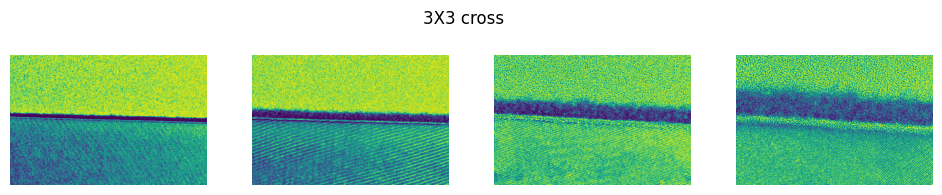

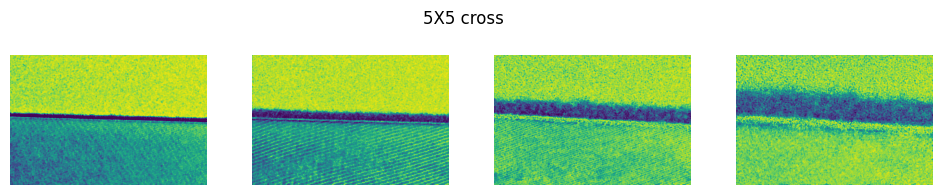

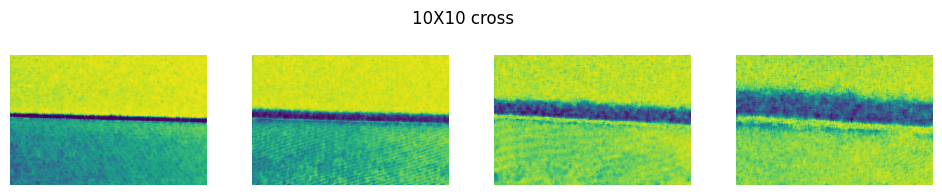

In [84]:
# cross
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
OptimalKernel(kernel, 3, 'cross')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
OptimalKernel(kernel, 5, 'cross')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))
OptimalKernel(kernel, 10, 'cross')

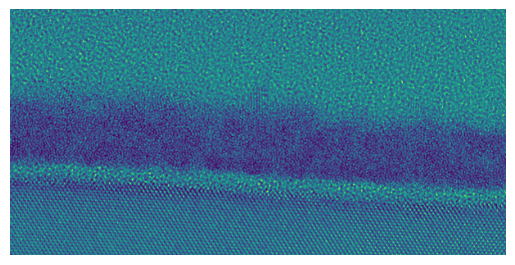

In [91]:
plt.imshow(img4[100:400,:])
plt.axis('off')
plt.show()

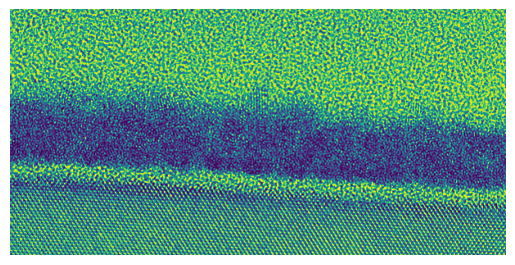

In [92]:
plt.imshow(cv2.equalizeHist(img4[100:400,:]))
plt.axis('off')
plt.show()

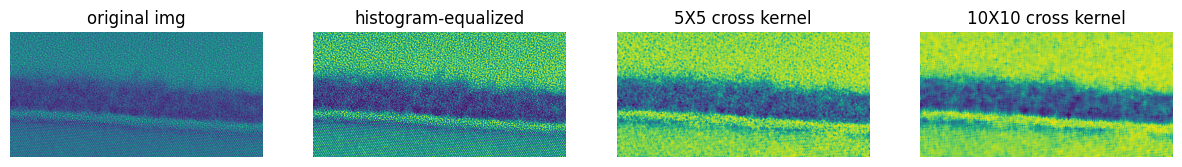

In [106]:
fig, axs = plt.subplots(1,4, figsize=(15,10))
# fig.tight_layout(pad=0.5)
axs[0].imshow(img4[100:400,:])
axs[0].set_axis_off()
axs[0].set_title('original img')

axs[1].imshow(cv2.equalizeHist(img4[100:400,:]))
axs[1].set_axis_off()
axs[1].set_title('histogram-equalized')

axs[2].imshow(cv2.morphologyEx(cv2.equalizeHist(img4[100:400,:]), op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))))
axs[2].set_axis_off()
axs[2].set_title('5X5 cross kernel')

axs[3].imshow(cv2.morphologyEx(cv2.equalizeHist(img4[100:400,:]), op=cv2.MORPH_CLOSE, kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))))
axs[3].set_axis_off()
axs[3].set_title('10X10 cross kernel')
plt.show()

In [2]:
# detect a line and get its length with cv2.HoughLinesP
import cv2
import numpy as np
img = np.zeros((500,500), np.uint8)
cv2.line(img, (100,400), (400,350), 255, 3)
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]
lines

array([[100, 402, 401, 349]], dtype=int32)

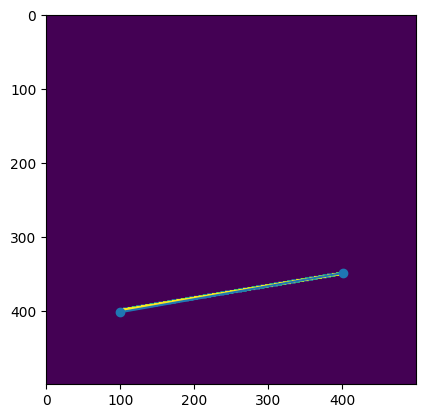

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)
for x1, y1, x2, y2 in lines:
    plt.plot([x1, x2], [y1, y2], 'o-')
plt.show()

In [9]:
import os
path = 'TEM_image/'
file = []
for f in os.listdir(path):
    if f.endswith('.jpg'):
        file.append(f)

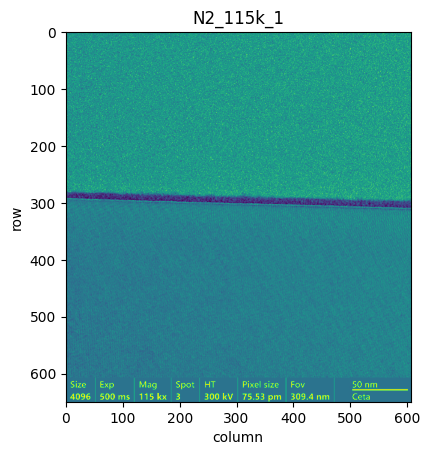

In [12]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(path+file[0], cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.xlabel('column')
plt.ylabel('row')
plt.title('N2_115k_1')
plt.show()

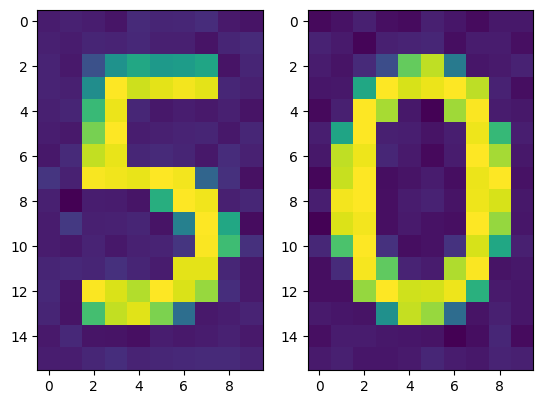

In [48]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img[611:627,501:511]) # 16X10
axs[1].imshow(img[611:627,510:520])
plt.show()

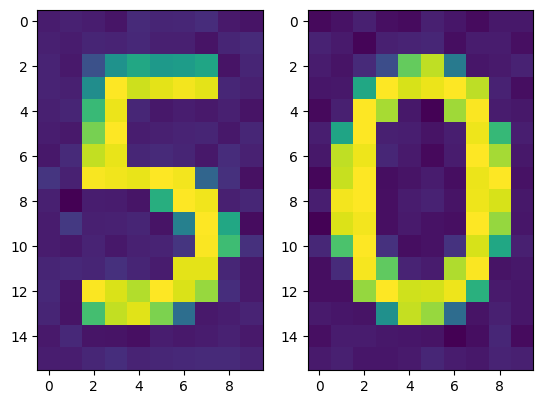

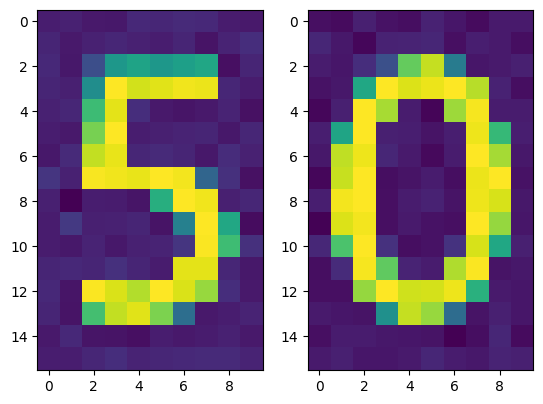

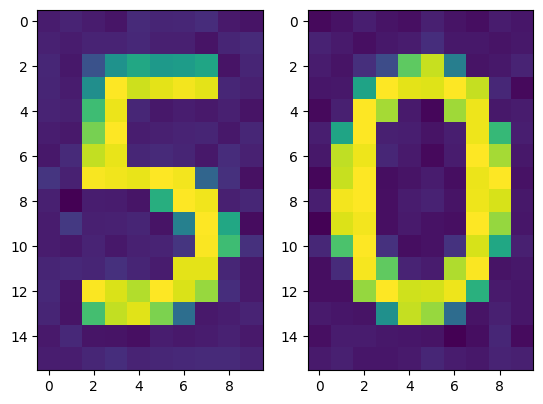

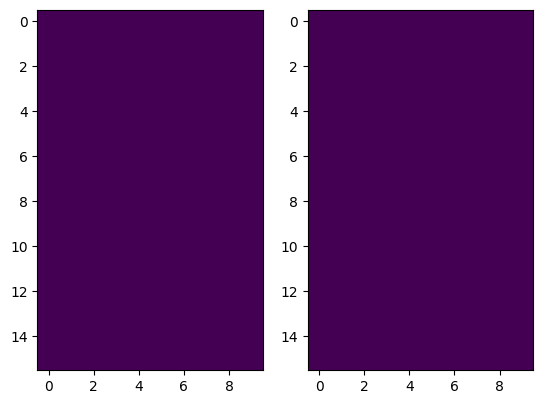

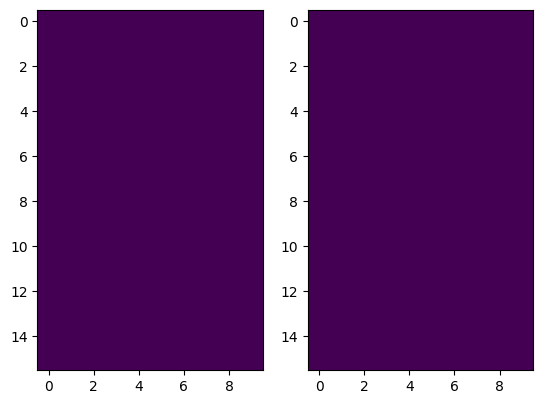

In [51]:
for i in range(len(file[:5])):
    img = cv2.imread(path+file[i], cv2.IMREAD_GRAYSCALE)
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(img[611:627,501:511]) # 16X10
    axs[1].imshow(img[611:627,510:520])
    plt.show()

Different sclales used; 50nm, 200nm, ... Try Optical Character Recognition (OCR) libraries like Tesseract Instead

In [54]:
!pip install pytesseract

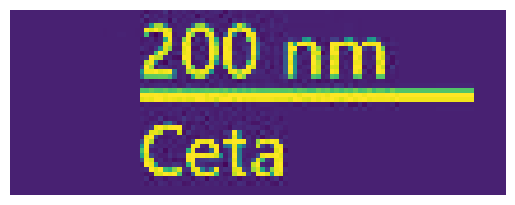

In [55]:
import pytesseract

# scale bar
scale_bar = img[610:,500:]
plt.imshow(scale_bar)
plt.axis('off')
plt.show()

In [84]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [86]:
import pytesseract

custom_config = r'--oem 3 --psm 6 outputbase digits'
numbers = pytesseract.image_to_string(scale_bar, config=custom_config)

print("Extracted Numbers:", numbers)

Extracted Numbers: 200

